In [20]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [2]:
df = pd.read_csv("Desktop/seattle-weather.csv")

In [4]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [11]:
df = df.drop(columns=['date'])
df.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [13]:
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [14]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [16]:
df.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [17]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

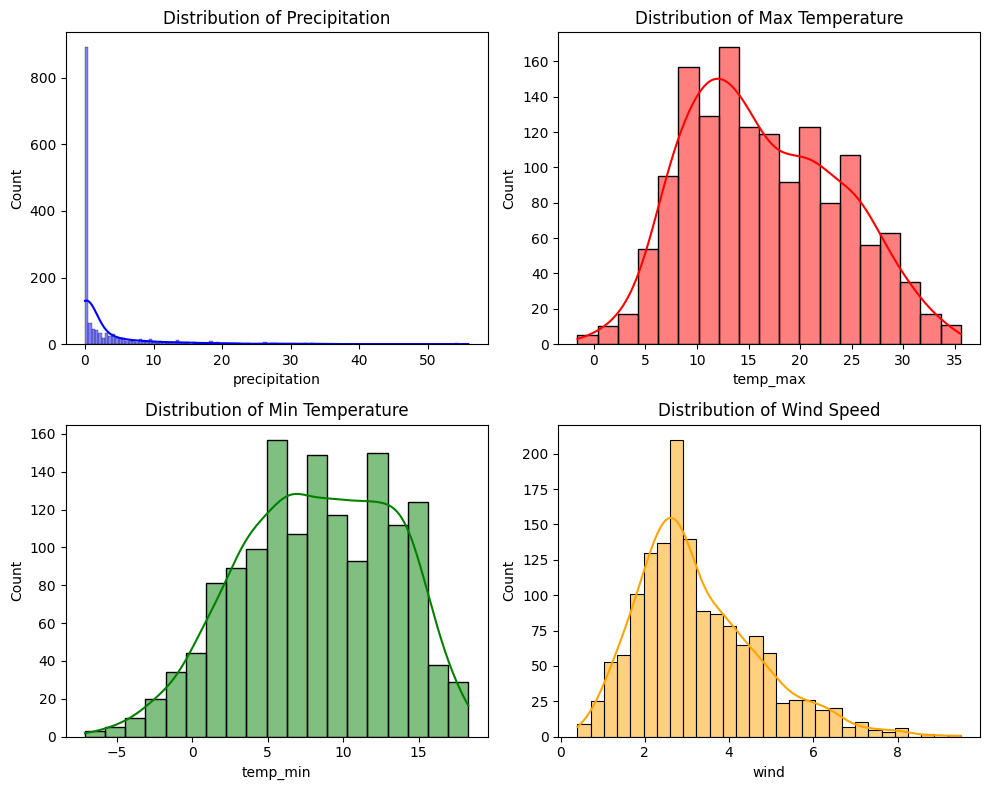

In [22]:
# Distribution Plots
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['precipitation'], kde=True, color='blue')
plt.title('Distribution of Precipitation')

plt.subplot(2, 2, 2)
sns.histplot(df['temp_max'], kde=True, color='red')
plt.title('Distribution of Max Temperature')

plt.subplot(2, 2, 3)
sns.histplot(df['temp_min'], kde=True, color='green')
plt.title('Distribution of Min Temperature')

plt.subplot(2, 2, 4)
sns.histplot(df['wind'], kde=True, color='orange')
plt.title('Distribution of Wind Speed')
plt.tight_layout()
plt.show()


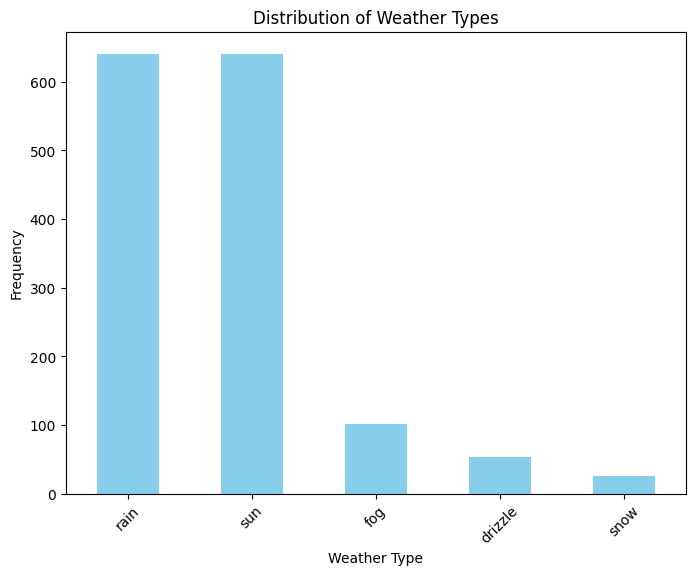

In [25]:
# Weather Distribution
weather_distribution = df['weather'].value_counts()
plt.figure(figsize=(8, 6))
weather_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Weather Types')
plt.xlabel('Weather Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

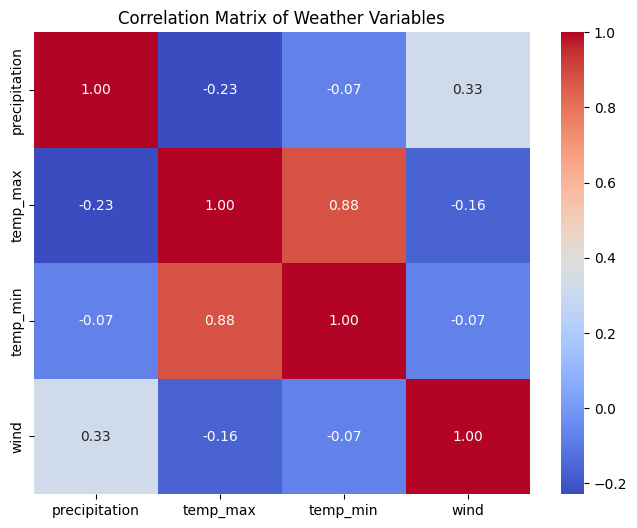

In [26]:
# Correlation Analysis
correlation_matrix = df[['precipitation', 'temp_max', 'temp_min', 'wind']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Variables')
plt.show()

Data

In [28]:
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']].values

In [31]:
X[0:5]

array([[ 0. , 12.8,  5. ,  4.7],
       [10.9, 10.6,  2.8,  4.5],
       [ 0.8, 11.7,  7.2,  2.3],
       [20.3, 12.2,  5.6,  4.7],
       [ 1.3,  8.9,  2.8,  6.1]])

Target Data

In [32]:
Y = df['weather']

In [33]:
Y[0:5]

0    drizzle
1       rain
2       rain
3       rain
4       rain
Name: weather, dtype: object

Setting Up decision tree

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

In [37]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (1022, 4) &  Size of Y training set (1022,)


In [38]:
print('Shape of X testing set {}'.format(X_testset.shape),'&',' Size of Y testing set {}'.format(y_testset.shape))

Shape of X testing set (439, 4) &  Size of Y testing set (439,)


Modeling

In [64]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
drugTree 

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [65]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

Prediction

In [66]:
predTree = drugTree.predict(X_testset)

In [67]:
print (predTree [0:5])
print (y_testset [0:5])


['rain' 'sun' 'sun' 'sun' 'sun']
140     rain
950      sun
248      sun
1361     sun
568      fog
Name: weather, dtype: object


In [68]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8154897494305239


Visualization

In [69]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Retrieving notices: ...working... done
Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::conda-pack==0.6.0=pyhd3eb1b0_0
  - defaults/osx-arm64::jupyter_core==5.3.0=py310hca03da5_0
  - defaults/osx-arm64::h5py==3.6.0=py310h181c318_0
  - defaults/osx-arm64::nbformat==5.7.0=py310hca03da5_0
  - defaults/osx-arm64::anaconda-project==0.11.1=py310hca03da5_0
  - defaults/osx-arm64::conda-repo-cli==1.0.41=py310hca03da5_0
  - defaults/osx-arm64::conda==23.7.2=py310hca03da5_0
  - defaults/osx-arm64::notebook==6.5.4=py310hca03da5_0
  - defaults/osx-arm64::jupyterlab_server==2.22.0=py310hca03da5_0
  - defaults/noarch::requests-toolbelt==0.9.1=pyhd3eb1b0_0
  - defaults/noarch::backports.functools_lru_cache==1.6.4=pyhd3eb1b0_0
  - defaults/osx-arm64::jupyter_server==1.23.4=py310hca03da5_0
  - defaults/osx-arm64::notebook-shim==0.2.2=py310hca03da5_0
  - apple/osx-arm64::tensorflow

In [70]:
from sklearn.tree import export_graphviz
export_graphviz(drugTree, out_file='tree.dot', filled=True, feature_names=['precipitation', 'temp_max', 'temp_min', 'wind'])
!dot -Tpng tree.dot -o tree.png


Random Forest Classifer

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
from sklearn.metrics import accuracy_score

In [84]:
random_forest = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)


In [85]:
random_forest.fit(X_trainset, y_trainset)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500, random_state=42)

In [86]:
PredictionForest = random_forest.predict(X_testset)

In [87]:
print (PredictionForest [0:5])
print (y_testset [0:5])

['rain' 'sun' 'sun' 'sun' 'sun']
140     rain
950      sun
248      sun
1361     sun
568      fog
Name: weather, dtype: object


In [89]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_testset, PredictionForest))

Random Forest's Accuracy:  0.8177676537585421


Performance Evaluation

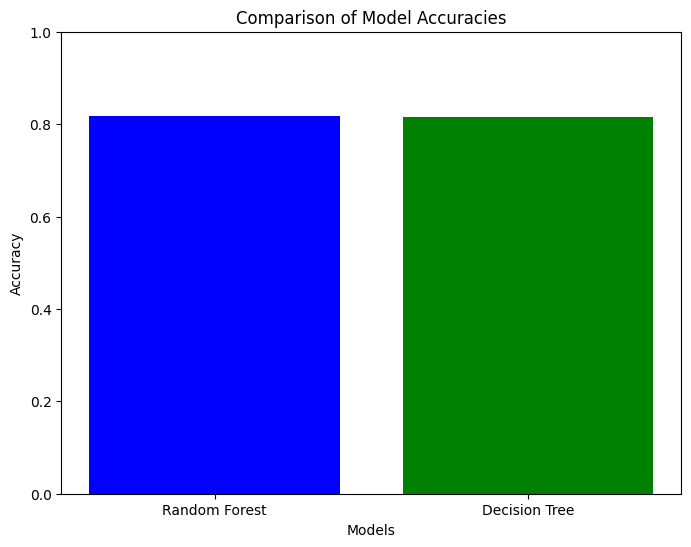

In [92]:
import matplotlib.pyplot as plt

# Assuming y_testset, PredictionForest, and predTree contain the actual labels and predicted labels for both models

# Calculate accuracies
accuracy_forest = metrics.accuracy_score(y_testset, PredictionForest)
accuracy_tree = metrics.accuracy_score(y_testset, predTree)

# Create a bar plot to compare accuracies
models = ['Random Forest', 'Decision Tree']
accuracies = [accuracy_forest, accuracy_tree]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.show()
